<div style="text-align: right">
    <i>
        LIN 5300<br>
        Spring 2022 <br>
        Aniello De Santo
    </i>
</div>



# Corpora, tokenization, and preprocessing

Let's try to implement some of the concepts we saw in class this week!

In [11]:
# Do all your imports in this cell

# We need this to import files into CoLab
from google.colab import files
# We will want to get counts
from collections import Counter
# in case we want to use pprint instead of pprint.pprint
from pprint import pprint  
# RegEX are always useful when working with corpora
import re



In [4]:
#Import files (this code is specific to reading files into Colab)
# Be sure to upload the file matching the variable name

hamlet = files.upload()
hamlet_full  = hamlet['hamlet_clean.txt'].decode('utf-8')


mars = files.upload()
mars_full = mars['mars_clean.txt'].decode('utf-8')



Saving hamlet_clean.txt to hamlet_clean (1).txt


Saving mars_clean.txt to mars_clean (1).txt


Let's now use our RegEx tokenization approach.

In [7]:
def tokenize(the_string):
    """Convert string to list of words"""
    return re.findall(r"\w+", the_string)


# define token lists for each corpus
hamlet = tokenize(hamlet_full)
mars = tokenize(mars_full)

**Caution.**
If you restart the kernel at any point, make sure to run all these previous cells again so that the variables for your corpora are defined.

## Counting words

Python makes it very easy to count how often an element occurs in a list: the `collections` library provides a function `Counter` that does the counting for us.
The `Counter` function takes as its only argument a list (like the ones produced by `re.findall` for tokenization).
It then converts the list into a *Counter*.
Here is what this looks like with a short example string.

In [9]:
test_string = "FTL is short for faster-than-light; we probably won't ever have space ships capable of FTL-travel."

# tokenize the string
tokens = tokenize(test_string)
print("The list of tokens:", tokens)

# add an empty line for easier visualization
print()

# and now do the counting
counts = Counter(tokens)
print("Number of tokens for each word type:", counts)

The list of tokens: ['FTL', 'is', 'short', 'for', 'faster', 'than', 'light', 'we', 'probably', 'won', 't', 'ever', 'have', 'space', 'ships', 'capable', 'of', 'FTL', 'travel']

Number of tokens for each word type: Counter({'FTL': 2, 'is': 1, 'short': 1, 'for': 1, 'faster': 1, 'than': 1, 'light': 1, 'we': 1, 'probably': 1, 'won': 1, 't': 1, 'ever': 1, 'have': 1, 'space': 1, 'ships': 1, 'capable': 1, 'of': 1, 'travel': 1})


Let's take a quick peak at what the counts looks like for each text.
We don't want to do this with something like `print(counts_hamlet)`, because the output would be so large that your browser might actually choke on it (it has happened to me sometimes).
Instead, we will look at the 100 most common words.
We can do this with the function `Counter.most_common`, which takes two arguments: a Counter, and a positive number.

We can use the function `pprint` from the `pprint` library to have each word on its own line.
The name *pprint* is short for *pretty-print*.

In [ ]:
# construct the counters
counts_hamlet = Counter(hamlet)
counts_mars = Counter(mars)

# Visualizing the 100 most common words for each corpus
print("Most common Hamlet words:")
pprint(Counter.most_common(counts_hamlet, 100))
print()
print("Most common John Carter words:")
pprint(Counter.most_common(counts_mars, 100))

**Python Practice.**
What is the difference between the following two pieces of code?
How do they differ in their output, and why?

Remember that we can use the [slice](https://stackoverflow.com/questions/509211/understanding-slice-notation) notation for strings and lists to test out code on subsets of data.

In [15]:
counts = Counter(hamlet[:50])
print(counts)

Counter({'francisco': 6, 'barnardo': 6, 'and': 2, 'enter': 1, 'two': 1, 'sentinels': 1, 'who': 1, 's': 1, 'there': 1, 'nay': 1, 'answer': 1, 'me': 1, 'stand': 1, 'unfold': 1, 'yourself': 1, 'long': 1, 'live': 1, 'the': 1, 'king': 1, 'he': 1, 'you': 1, 'come': 1, 'most': 1, 'carefully': 1, 'upon': 1, 'your': 1, 'hour': 1, 'tis': 1, 'now': 1, 'struck': 1, 'twelve': 1, 'get': 1, 'thee': 1, 'to': 1, 'bed': 1, 'for': 1, 'this': 1, 'relief': 1, 'much': 1})


In [16]:
count = Counter(hamlet)
print(Counter.most_common(count, 50))

[('the', 1060), ('and', 962), ('to', 728), ('of', 662), ('i', 623), ('you', 558), ('a', 525), ('my', 516), ('hamlet', 458), ('in', 434), ('it', 420), ('that', 405), ('is', 357), ('not', 314), ('this', 300), ('his', 295), ('d', 285), ('with', 266), ('but', 263), ('for', 252), ('your', 242), ('s', 235), ('me', 235), ('he', 231), ('as', 227), ('be', 222), ('lord', 221), ('what', 218), ('so', 198), ('king', 197), ('him', 194), ('have', 183), ('will', 170), ('do', 161), ('o', 155), ('we', 152), ('horatio', 150), ('no', 142), ('on', 136), ('are', 130), ('our', 119), ('if', 117), ('by', 117), ('all', 116), ('queen', 116), ('or', 114), ('shall', 114), ('good', 110), ('thou', 107), ('let', 105)]


## A problem

If you look at the lists of 100 most common words for each text, you'll notice that they are fairly similar.
For instance, all of them have *a*, *the*, and *to* among the most frequent ones.
That's not a peculiarity of these few texts, it's a general property of English texts.
This is because of **Zipf's law**: ranking words by their frequency, the n-th word will have a relative frequency of 1/n.
So the most common word is twice as frequent as the second most common one, three times more frequent than the third most common one, and so on.
As a result, a handful of words make up over 50% of all words in a text.

Zipf's law means that word frequencies in a text give rise to a peculiar shape that we might call the Zipf dinosaur.


A super-high neck, followed by a very long tail.
For English texts, the distribution usually resembles the one below, and that's even though this graph only shows the most common words.




In [ ]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/fCn8zs912OE"  frameborder="0" allowfullscreen></iframe>')


There is precious little variation between English texts with respect to which words are at the top.
These common but uninformative words are called **stop words**.
If we want to find any interesting differences between *Hamlet*, and *Princess of Mars*, we have to filter out all these stop words.
That's not something we can do by hand, but our existing box of tricks doesn't really seem to fit either.
We could use a regular expression to delete all these words from the string before it even gets tokenized.
But that's not the best solution:

1. A minor mistake in the regular expression might accidentally delete many things we want to keep.
   Odds are that this erroneous deletion would go unnoticed, possibly invalidating our stylistic analysis.
1. There's hundreds of stop words, so the regular expression would be very long.
   Ideally, our code should be compact and easy to read.
   A super-long regular expression is the opposite of that, and it's no fun to type either.
   And of course, the longer a regular expression, the higher the chance that you make a typo (which takes us back to point 1).
1. While regular expressions are fast, they are not as fast as most of the operations Python can perform on lists and counters.
   If there is an easy alternative to a regular expression, that alternative is worth exploring.

Alright, so if regexes aren't the best solution, what's the alternative?
Why, it's simple: 0.

## Changing counts

The values in a Python counter can be changed very easily.

In [ ]:
# define a test counter and show its values
test = Counter(["John", "said", "that", "Mary", "said", "that", "Bill", "stinks"])
pprint(test)

# 'that' is a stop word; set its count to 0
test["that"] = 0
pprint(test)

Counter({'said': 2, 'that': 2, 'John': 1, 'Mary': 1, 'Bill': 1, 'stinks': 1})
Counter({'said': 2, 'John': 1, 'Mary': 1, 'Bill': 1, 'stinks': 1, 'that': 0})


The code above uses the new notation `test['that']`.

Counters are a subclass of dictionaries, so `test["that"]` points to the value for `"that"` in the counter `test`.
We also say that `"that"` is a **key** that points to a specific **value**.
The line

```python
test["that"] = 0
```

intstructs Python to set the value for the key `"that"` to `0`.

**Python practice.**
Look at the code cell below.
For each line, add a comment that briefly describes what it does (for instance, *set value of 'that' to 0*).
If the line causes an error, fix the error and add two commments:

1. What caused the error?
1. What does the corrected line do?

You might want to use `pprint` to look at how the counter changes after each line.

In [17]:

test = Counter(["John", "said", "that", "Mary", "said", "that", "Bill", "stinks"])

test["that"] = 0 
test["Mary"] = test["that"]
test[John] = 10
test["said"] = test["John' - 'said"]
test["really"] = 0

NameError: ignored

Since we can change the values of keys in counters, stop words become very easy to deal with.
Recall that the problem with stop words is not so much that they occur in the counter, but that they make up the large majority of high frequency words.
Our intended fix was to delete them from the counter.
But instead, we can just set the count of each stop word to 0.
Then every stop word is still technically contained by the counter, but since its frequency is 0 it will no longer show up among the most common words, which is what we really care about.


With a `for`-loop, setting the counts of stop words to 0 becomes a matter of just a few lines.

In [18]:
# construct the counters
counts_hamlet = Counter(hamlet)
counts_mars = Counter(mars)

stopwords = ["the", "of", "and", "a", "to", "in",
             "that", "his", "it", "he", "but", "as",
             "is", "with", "was", "for", "all", "this",
             "at", "while", "by", "not", "from", "him",
             "so", "be", "one", "you", "there", "now",
             "had", "have", "or", "were", "they", "which",
             "like"]

for word in stopwords:
    counts_hamlet[word] = 0
    counts_mars[word] = 0

Okay, now we can finally compare the texts based on their unigram counts.
You can use the `Counter.most_common` function to see which words are most common in each text.
We can also compare the overall frequency distribution.
The code below will plot the counters, giving you a graphical representation of the frequency distribution, similar to the Zipf figures above.

(Don't worry about what any of the code below does.
Just run the cell and look at the pretty output.)

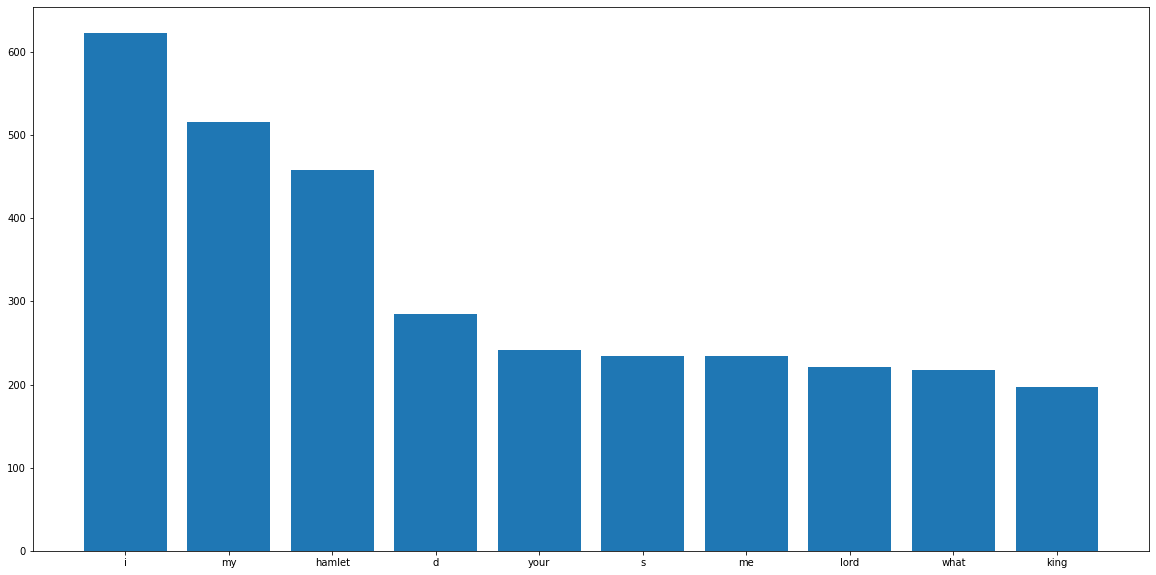

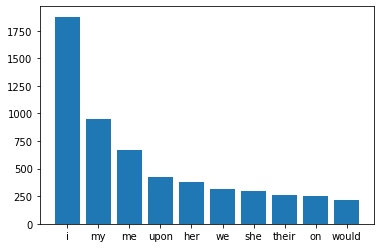

In [19]:
%matplotlib inline

# import relevant matplotlib code (this is the only case in which I do the import here)
import matplotlib.pyplot as plt

# figsize(20, 10)
plt.figure(figsize=(20,10))
# the lines above are needed for Jupyter to display the plots in your browser
# do not remove them

# a little bit of preprocessing so that the data is ordered by frequency
def plot_preprocess(the_counter, n):
    """format data for plotting n most common items"""
    sorted_list = sorted(the_counter.items(), key=lambda x: x[1], reverse=True)[:n]
    words, counts = zip(*sorted_list)
    return words, counts


for text in [counts_hamlet, counts_mars]:
    # you can change the max words value to look at more or fewer words in one plot
    max_words = 10
    words = plot_preprocess(text, max_words)[0]
    counts = plot_preprocess(text, max_words)[1]
    plt.bar(range(len(counts)), counts, align="center")
    plt.xticks(range(len(words)), words)
    plt.show()

So there you have it.
Now we can compare the texts among several dimensions:

1. What are the most common words in each text?
1. Are the distributions very different?
   Perhaps one of them keeps repeating the same words over and over, whereas another author varies their vocabulary more and thus has a smoother curve that's not as much tilted towards the left?
   